## Model Selection & Evaluation

<hr>

### Agenda
1. Cross Validation
2. Hyperparameter Tuning  
3. Model Evaluation
4. Model Persistance
5. Validation Curves
6. Learning Curves

<hr>

### 1. Cross Validation
* Simple models underfit.
* Accuracy for training data & validation data is not much different.
* But, accurcy ain't that great.
* This situation is of low variance & high bias
* On moving towards complex models, accuracy improves.
* But, gap between accuracy on training data & validation data increases
* This situation is of high variance & low bias

<img src="https://www.researchgate.net/profile/Ljubomir_Jacic2/post/How_does_model_complexity_impact_the_bias-variance_tradeoff/attachment/59d6233579197b807798188f/AS%3A306150770184192%401450003439733/image/biasvariance.png" width="400px">

* We need to compare across models to find the best model.
* We need to compare across all hyper-parameters for a particular model.
* The data that is used for training should not be used for validation.
* The validation accuracy is the one that we claims

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

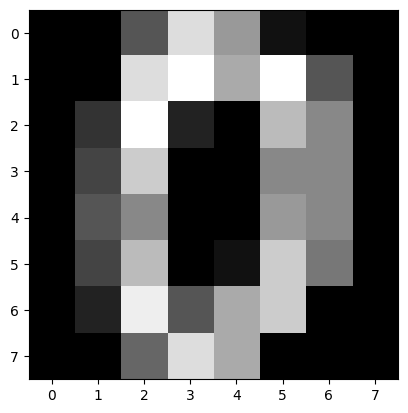

In [5]:
plt.imshow(digits.images[0],cmap='gray')

In [6]:
dt = DecisionTreeClassifier(max_depth=None)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
trainX, testX, trainY, testY = train_test_split(digits.data, digits.target)

In [9]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [10]:
dt.score(testX,testY)

0.8577777777777778

In [11]:
dt.score(trainX,trainY)

1.0

* Decreasing the complexity of model

In [12]:
dt = DecisionTreeClassifier(max_depth=7)

In [13]:
dt.fit(trainX,trainY)

DecisionTreeClassifier(max_depth=7)

In [14]:
dt.score(testX,testY)

0.8088888888888889

In [15]:
dt.score(trainX,trainY)

0.8864142538975501

* Observation : With decrease in complexity the gap in training & validation accuracy also decreased

#### Cross Validation API
* Splits data into k parts.
* Use k - 1 parts for training the model
* Use kth part for validation
* Repeat the above steps multiple times to get a genralized behaviour

In [16]:
from sklearn.model_selection import cross_val_score # this is meant for scoring purposes only.

In [17]:
scores = cross_val_score(dt, digits.data, digits.target, cv =5)

In [18]:
scores

array([0.74444444, 0.65555556, 0.77158774, 0.77715877, 0.75766017])

In [19]:
scores.mean()

np.float64(0.7412813370473538)

In [20]:
scores.std()

np.float64(0.04434602514529707)

#### Cross-validate Function : Scores for multiple matrices

In [21]:
from sklearn.model_selection import cross_validate # this does training and testing

In [22]:
scoring = ['precision_macro', 'recall_macro', 'accuracy']

In [23]:
cross_validate(dt, digits.data, digits.target, scoring=scoring, cv=5)

{'fit_time': array([0.07663798, 0.13568854, 0.05167437, 0.06835151, 0.03927255]),
 'score_time': array([0.05984402, 0.0310955 , 0.03410816, 0.03003025, 0.04297876]),
 'test_precision_macro': array([0.76458151, 0.72806389, 0.7798797 , 0.80312737, 0.77931403]),
 'test_recall_macro': array([0.75016946, 0.6865015 , 0.77035544, 0.77849421, 0.76287001]),
 'test_accuracy': array([0.75      , 0.68611111, 0.77158774, 0.77994429, 0.76044568])}

#### Stratification for dealing with imbalanced Classes
* StratifiedKFold
  - Class frequencies are preserved in data splitting

In [24]:
import numpy as np

In [25]:
Y = np.append(np.ones(12),np.zeros(6))

In [26]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0.])

In [27]:
X = np.ones((18,3))

In [28]:
X

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
skf = StratifiedKFold(n_splits=3)

In [31]:
list(skf.split(X,Y))

[(array([ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]),
  array([ 0,  1,  2,  3, 12, 13])),
 (array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 13, 16, 17]),
  array([ 4,  5,  6,  7, 14, 15])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7, 12, 13, 14, 15]),
  array([ 8,  9, 10, 11, 16, 17]))]

In [32]:
Y[[ 4,  5,  6,  7,  8,  9, 10, 11, 14, 15, 16, 17]]

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [33]:
Y[[ 0,  1,  2,  3, 12, 13]]

array([1., 1., 1., 1., 0., 0.])

### 2. Hyperparameter Tuning
* Model parameters are learnt by learning algorithms based on data
* Hyper-parameters needs to be configured
* Hyper-parameters are data dependent & many times need experiments to find the best
* sklearn provides GridSerach for finding the best hyper-parameters

##### Exhaustive GridSearch
* Searches sequentially for all the configued params
* For all possible combinations

In [34]:
dt = DecisionTreeClassifier()

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_search = GridSearchCV(dt, param_grid={'max_depth':range(5,30,5),'min_samples_split':[2,3,4,5]}, cv=5, n_jobs=-1 , scoring= 'recall_macro', verbose=4)

In [37]:
grid_search.fit(digits.data,digits.target)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 30, 5),
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='recall_macro', verbose=4)

In [38]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 3}

In [39]:
model = grid_search.best_estimator_

In [40]:
grid_search.cv_results_

{'mean_fit_time': array([0.05124288, 0.02898192, 0.04070907, 0.03896303, 0.06567631,
        0.08141527, 0.0637742 , 0.10205321, 0.07856069, 0.0766274 ,
        0.11417546, 0.08645792, 0.14535961, 0.05592656, 0.0865634 ,
        0.10440884, 0.12698054, 0.08806415, 0.13650751, 0.08491988]),
 'std_fit_time': array([0.01996861, 0.0075537 , 0.01449242, 0.0178223 , 0.02490368,
        0.02451704, 0.01963005, 0.04297797, 0.01337697, 0.02318865,
        0.02866235, 0.02000628, 0.03988173, 0.01619797, 0.00820187,
        0.01745402, 0.02202445, 0.02203162, 0.02382784, 0.02734489]),
 'mean_score_time': array([0.01533079, 0.00889153, 0.00980473, 0.00609417, 0.00647593,
        0.00863099, 0.00905986, 0.01344781, 0.01688261, 0.01518683,
        0.01840739, 0.01259551, 0.02333603, 0.01121831, 0.01420908,
        0.01665292, 0.01952353, 0.01391592, 0.02532859, 0.01204438]),
 'std_score_time': array([0.00558629, 0.00404948, 0.00274104, 0.0022729 , 0.0022221 ,
        0.00236167, 0.00281434, 0.012629

In [41]:
grid_search.best_score_

np.float64(0.7902843768137886)

In [42]:
model = grid_search.best_estimator_

In [43]:
model

DecisionTreeClassifier(max_depth=20, min_samples_split=3)

In [ ]:
# dummy code

model.predict(xVal)

NameError: ignored

#### RandomizedSearch
* Unlike GridSearch, not all parameters are tried & tested
* But rather a fixed number of parameter settings is sampled from the specified distributions.

##### Comparing GridSearch and RandomSearchCV

In [44]:
from time import time

#randint is an iterator for generating numbers between range specified
from scipy.stats import randint

In [45]:
X = digits.data
Y = digits.target

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [47]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3,5,7, None],
              "max_features": randint(1,11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [48]:
param_dist

{'max_depth': [3, 5, 7, None],
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7abb64e53190>,
 'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x7abb62b20390>,
 'bootstrap': [True, False],
 'criterion': ['gini', 'entropy']}

In [49]:
rf = RandomForestClassifier(n_estimators=100)

In [50]:
n_iter_search = 50
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, n_jobs=-1, verbose=1)

start = time()
random_search.fit(X, Y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
RandomizedSearchCV took 69.92 seconds for 50 candidates parameter settings.


In [51]:
random_search.best_score_

np.float64(0.944363974001857)

In [52]:
random_search.cv_results_

{'mean_fit_time': array([0.64279776, 0.515414  , 0.47672806, 0.26763272, 0.75416074,
        0.62856903, 0.56752281, 0.45684776, 0.26589913, 0.3935535 ,
        0.30729494, 0.60166841, 0.71632595, 0.77161946, 0.50029244,
        0.64224157, 0.29533095, 0.35399113, 0.43363032, 0.43926287,
        0.4316669 , 0.58492312, 0.44686689, 0.39636292, 0.58804541,
        0.47643843, 0.4867671 , 0.30940714, 0.36612139, 0.7481338 ,
        0.33899469, 0.52089024, 0.5335217 , 0.6331707 , 0.58962727,
        0.52182994, 0.58703203, 0.50935345, 0.38976183, 0.37960815,
        0.74893084, 0.4640697 , 0.51464701, 0.86742959, 0.43712244,
        0.74265881, 0.37023993, 0.24367723, 0.59436116, 0.38445492]),
 'std_fit_time': array([0.1839651 , 0.05102388, 0.10115476, 0.01213841, 0.00717366,
        0.00322611, 0.00731746, 0.00799817, 0.00778641, 0.00807568,
        0.0739906 , 0.08385769, 0.1245099 , 0.04463238, 0.01480594,
        0.01255101, 0.00964588, 0.01560188, 0.01839262, 0.01077556,
        0.098

In [53]:
random_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 2,
 'min_samples_split': 3}

In [54]:
param_grid = {"max_depth": [3,5,7,None],
              "max_features": [2,3,4,5],
              "min_samples_split": [4,5,6,7],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
start = time()
grid_search.fit(X, Y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
GridSearchCV took 298.08 seconds for 256 candidate parameter settings.


In [55]:
grid_search.best_score_

np.float64(0.9471510368307026)

In [56]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=3, min_samples_split=6)

In [57]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 6}

* GridSearch & RandomizedSearch can fine tune hyper-parameters of transformers as well when part of pipeline

### 3. Model Evaluation
* Three different ways to evaluate quality of model prediction
  - score method of estimators, a default method is configured .i.e r2_score for regression, accuracy for classification
  - Model evalutaion tools like cross_validate or cross_val_score also returns accuracy
  - Metrices module is rich with various prediction error calculation techniques

In [58]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [59]:
rf.fit(trainX, trainY)

RandomForestClassifier()

* Technique 1 - Using score function

In [60]:
rf.score(testX,testY)

0.9666666666666667

* Technique 2 - Using cross_val_score as discussed above

In [61]:
cv_score =cross_val_score(rf,X,Y,cv=5)

In [62]:
cv_score.mean()

np.float64(0.9343608789848344)

#### Cancer prediction sample for understanding metrices

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
dt = DecisionTreeClassifier()

In [65]:
cancer_data = load_breast_cancer()

In [66]:
trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [67]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [68]:
pred = dt.predict(testX)

#### Technique 3 - Using metrices
##### Classfication metrices
* Accuracy Score - Correct classification vs ( Correct classification + Incorrect Classification )

In [69]:
from sklearn import metrics

In [70]:
metrics.accuracy_score(y_pred=pred, y_true=testY)

0.916083916083916

* Confusion Matrix - Shows details of classification inclusing TP,FP,TN,FN
  - True Positive (TP), Actual class is 1 & prediction is also 1
  - True Negative (TN), Actual class is 0 & prediction is also 0
  - False Positive (FP), Acutal class is 0 & prediction is 1
  - False Negative (FN), Actual class is 1 & prediction is 0

In [71]:
metrics.confusion_matrix(y_pred=pred, y_true=testY, labels=[0,1])

array([[45,  3],
       [ 9, 86]])

* Precision Score
  - Ability of a classifier not to label positive if the sample is negative
  - Claculated as TP/(TP+FP)
  - We don't want a non-spam mail to be marked as spam

In [ ]:
metrics.precision_score(y_pred=pred, y_true=testY)

0.9382716049382716

* Recall Score
  - Ability of classifier to find all positive samples
  - It's ok to predict patient tumor to be cancer so that it undergoes more test
  - But it is not ok to miss a cancer patient without further analysis

In [ ]:
metrics.recall_score(y_pred=pred, y_true=testY)

0.9156626506024096

* F1 score
  - Weighted average of precision & recall

In [ ]:
metrics.f1_score(y_pred=pred, y_true=testY)

0.9268292682926829

* ROC & AUC

##### House Price Prediction - Understanding matrices

In [ ]:
from sklearn.datasets import california_housing

In [ ]:
house_data = california_housing.fetch_california_housing()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(house_data.data, house_data.target)

In [ ]:
pred = lr.predict(house_data.data)

#### Matrices for Regression
* mean squared error
  - Sum of squares of difference between expected value & actual value

In [ ]:
metrics.mean_squared_error(y_pred=pred, y_true=house_data.target)

* mean absolute error
  - Sum of abs of difference between expected value & actual value

In [ ]:
metrics.mean_absolute_error(y_pred=pred, y_true=house_data.target)

* r2 score
  - Returns accuracy of model in the scale of 0 & 1
  - It measures goodness of fit for regression models
  - Calculated as =  (variance explained by the model)/(Total variance)
  - High r2 means target is close to prediction
  
  
  <img src="https://github.com/awantik/machine-learning-slides/blob/master/Capture.PNG?raw=true" width="400px">

In [ ]:
metrics.r2_score(y_pred=pred, y_true=house_data.target)

### Metrices for Clustering
* Two forms of evaluation
* supervised, which uses a ground truth class values for each sample.
  - completeness_score
  - homogeneity_score
* unsupervised, which measures the quality of model itself
  - silhoutte_score
  - calinski_harabaz_score

##### completeness_score
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.
- Accuracy is 1.0 if data belonging to same class belongs to same cluster, even if multiple classes belongs to same cluster

In [ ]:
from sklearn.metrics.cluster import completeness_score

In [ ]:
completeness_score( labels_true=[10,10,11,11],labels_pred=[1,1,0,0])

1.0

* The acuracy is 1.0 because all the data belonging to same class belongs to same cluster

In [ ]:
completeness_score( labels_true=[11,22,22,11],labels_pred=[1,0,1,1])

0.3836885465963443

* The accuracy is .3 because class 1 - [11,22,11], class 2 - [22]  

In [ ]:
print(completeness_score([10, 10, 11, 11], [0, 0, 0, 0]))

1.0


##### homogeneity_score
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.

In [ ]:
from sklearn.metrics.cluster import homogeneity_score

In [ ]:
homogeneity_score([6, 6, 7, 7], [1, 1, 0, 0])

1.0

In [ ]:
print(homogeneity_score([10, 10, 11, 11], [0, 0, 0, 0]))

0.0


In [ ]:
homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3])

0.9999999999999999

In [ ]:
homogeneity_score([0, 0, 0, 0], [1, 1, 0, 0])

1.0

* Same class data is broken into two clusters

In [ ]:
from sklearn.metrics.cluster import v_measure_score, homogeneity_completeness_v_measure
homogeneity_completeness_v_measure([10,10, 11, 11], [1,1, 0,0])

(1.0, 1.0, 1.0)

In [ ]:
homogeneity_completeness_v_measure ([0, 0, 1, 1], [0, 1, 2, 3])

(0.9999999999999999, 0.49999999999999994, 0.6666666666666666)

In [ ]:
homogeneity_completeness_v_measure([0, 0, 0, 0], [1, 1, 0, 0])

(1.0, 0.0, 0.0)

In [ ]:

homogeneity_completeness_v_measure([6, 6, 7, 7], [1, 1, 1,1])

(0.0, 1.0, 0.0)

#### silhoutte_score
* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

##### Selecting the number of clusters with silhouette analysis on KMeans clustering

In [ ]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

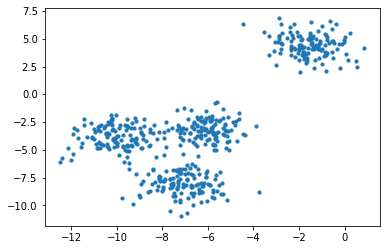

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],s=10)

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12] #grid search

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
sillhoute_score_list = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))
    sillhoute_score_list.append(silhouette_score(X,labels))

2 0.7049787496083262
3 0.5882004012129721
4 0.6505186632729437
5 0.5743946554642042
6 0.45030120826587716
7 0.39542628437537775
8 0.3270765789941281
9 0.32499304816759705
10 0.3411788983339644
11 0.34669019643748766
12 0.34887901813365774


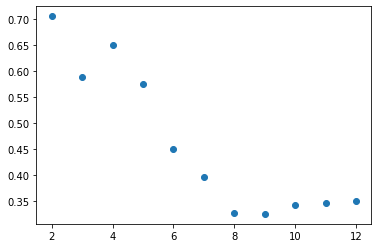

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(range_n_clusters, sillhoute_score_list)
plt.show()

* The best number of clusters is 2

#### calinski_harabaz_score
* The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

calinski_score_list = []
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, calinski_harabasz_score(X,labels))
    calinski_score_list.append(calinski_harabasz_score(X,labels))

2 1604.112286409658
3 1809.991966958033
4 2704.4858735121097
5 2282.106684440563
6 2035.5634187035685
7 1918.1313094912514
8 1849.0197194698032
9 1783.5579792836857
10 1758.4045102602108
11 1740.0973640488507
12 1770.6929725762307


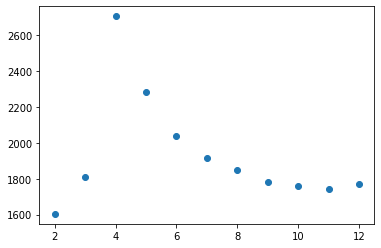

In [ ]:
plt.scatter(range_n_clusters, calinski_score_list)
plt.show()

### 4. Model Persistance
* Model training is an expensive process
* It is desireable to save the model for future reuse
* using pickle & joblib this can be achieved

In [72]:
import pickle

In [73]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

In [ ]:
# trainX, testX, trainY, testY = train_test_split(cancer_data.data, cancer_data.target)

In [74]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [75]:
from sklearn.svm import SVC

svc_clf = SVC()

In [76]:
from sklearn.preprocessing import RobustScaler
scalr = RobustScaler()

In [77]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(scalr, svc_clf)

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C':[1,5,10,20,50],
              'svc__kernel':['poly', 'rbf', 'sigmoid'],
              'svc__degree':[3,4,5,6,7],
              'svc__gamma':[0.1, 0.5, 1, 5, 10]
              }
grid_search_cv = GridSearchCV(model, param_grid= param_grid, verbose=3, n_jobs=-1)
grid_search_cv.fit(cancer_data.data, cancer_data.target)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits


GridSearchCV(estimator=Pipeline(steps=[('robustscaler', RobustScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 5, 10, 20, 50],
                         'svc__degree': [3, 4, 5, 6, 7],
                         'svc__gamma': [0.1, 0.5, 1, 5, 10],
                         'svc__kernel': ['poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
# dt.fit(trainX, trainY)

In [79]:
grid_search_cv.best_params_

{'svc__C': 10, 'svc__degree': 3, 'svc__gamma': 0.1, 'svc__kernel': 'poly'}

In [80]:
grid_search_cv.cv_results_

{'mean_fit_time': array([0.01643281, 0.02052526, 0.01821504, 0.01768403, 0.03465109,
        0.02033992, 0.01621819, 0.03659496, 0.02260571, 0.01704926,
        0.03782163, 0.018191  , 0.01671443, 0.03976874, 0.01719275,
        0.02199726, 0.02122641, 0.01726418, 0.02591357, 0.03440914,
        0.02179923, 0.02540822, 0.03600678, 0.01957626, 0.02384782,
        0.03804731, 0.01815195, 0.02415452, 0.04279342, 0.02002983,
        0.01629319, 0.02333627, 0.02343273, 0.02903214, 0.0571394 ,
        0.02242236, 0.01771207, 0.03772106, 0.01956315, 0.01764264,
        0.04025564, 0.01769724, 0.01673212, 0.04159193, 0.02142367,
        0.02183189, 0.02302356, 0.0180768 , 0.02727451, 0.0342123 ,
        0.02041311, 0.02741003, 0.0360044 , 0.01904254, 0.02630181,
        0.03801398, 0.0175859 , 0.02648926, 0.04466028, 0.01739421,
        0.01743293, 0.02291079, 0.01825051, 0.01903186, 0.03674555,
        0.02249126, 0.0174314 , 0.04533095, 0.02180543, 0.02154002,
        0.05986581, 0.0196485 ,

In [81]:
best_clf_model = grid_search_cv.best_estimator_

In [82]:
with open('svc_model.pickle', 'wb') as handle:
    pickle.dump(best_clf_model, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [83]:
! ls -l

total 28
drwxr-xr-x 1 root root  4096 Mar 19 13:34 sample_data
-rw-r--r-- 1 root root 23516 Mar 21 15:48 svc_model.pickle


In [84]:
with open('svc_model.pickle','rb') as handle:
    b = pickle.load(handle)

In [85]:
type (b)

sklearn.pipeline.Pipeline

In [86]:
b.score(cancer_data.data,cancer_data.target)

0.9964850615114236

In [87]:
pred = b.predict(cancer_data.data)

In [88]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [89]:
from sklearn.metrics import classification_report

print(classification_report(cancer_data.target, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       212
           1       0.99      1.00      1.00       357

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



* joblib is better extension of pickle
* Doesn't convert into string

In [90]:
import joblib

In [91]:
joblib.dump(dt, 'dt.joblib')

['dt.joblib']

* Loading the file back into model

In [92]:
dt = joblib.load('dt.joblib')

In [93]:
dt

DecisionTreeClassifier()

### 5. Validation Curves
* To validate a model, we need a scoring function.
* Create a grid of possible hyper-prameter configuration.
* Select the hyper-parameter which gives the best score

In [94]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
param_range = np.arange(5, 150, 5)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                             digits.data,
                                             digits.target,
                                             param_name="n_estimators",
                                             param_range=param_range,
                                             cv=5,
                                             scoring="recall_macro",
                                             n_jobs=-1)

In [95]:
print(train_scores)

[[0.99723154 0.99718184 0.9916159  0.99306746 0.99306384]
 [0.99931034 1.         0.99930556 1.         0.99859092]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1

In [96]:
print(test_scores)

[[0.84711283 0.82202917 0.89921405 0.87664522 0.86389961]
 [0.89157443 0.8672544  0.94122972 0.94387602 0.8923831 ]
 [0.90515873 0.9030695  0.9438441  0.93460317 0.90836551]
 [0.89999142 0.87767696 0.95241123 0.96626126 0.91701201]
 [0.91357143 0.87003218 0.95496379 0.95792364 0.91693694]
 [0.93031746 0.88917203 0.9440779  0.94109824 0.91971042]
 [0.94150794 0.91148649 0.96315593 0.95499142 0.92009438]
 [0.92753968 0.88654869 0.94972178 0.96348348 0.91701201]
 [0.93039683 0.92236379 0.96331037 0.9688846  0.90882454]
 [0.93587302 0.9114822  0.95774157 0.96332904 0.91685328]
 [0.93309524 0.88623552 0.96059442 0.96332475 0.90882454]
 [0.93587302 0.91425568 0.96035594 0.95212999 0.93082583]
 [0.9247619  0.88917632 0.95233616 0.95799871 0.92272201]
 [0.93595238 0.9168876  0.96353559 0.96062205 0.93120978]
 [0.93579365 0.91402617 0.96592475 0.95784427 0.91700772]
 [0.92753968 0.89481553 0.95233616 0.96355856 0.93352853]
 [0.92753968 0.9114822  0.95790067 0.97166238 0.93623123]
 [0.92753968 0

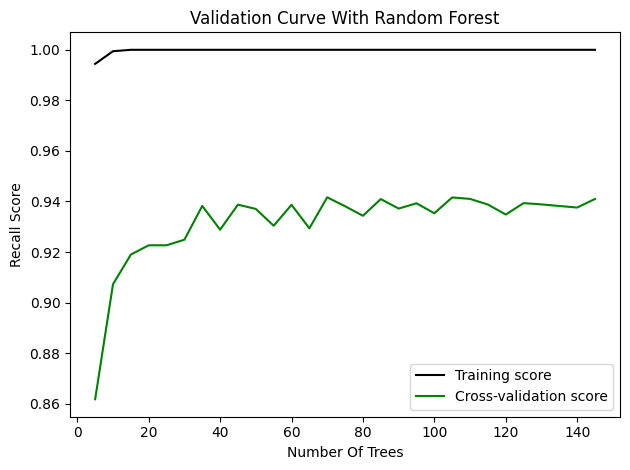

In [97]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="green")

plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Recall Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()